In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from google.colab import drive
from itertools import cycle

In [17]:
drive.mount('/content/drive', force_remount=True)
location ='drive/MyDrive/ML-Dataset/final/'
list_of_files = os.listdir(location)

df= pd.read_csv(location+'bank-database.csv', sep = ',')
df

Mounted at /content/drive


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [18]:
df = df.drop(["duration"],axis=1)

df['job'].replace(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'],
                        [0, 1, 2, 3, 4 ,5 ,6 ,7 ,8 ,9 ,1, 11], inplace=True)
df['marital'].replace(['divorced', 'married', 'single', 'unknown'],
                        [0, 1, 2, 3], inplace=True)
df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate', 'professional.course' , 'university.degree', 'unknown'],
                        [0, 1, 2, 3, 4, 5 ,6, 7], inplace=True)
df['default'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['housing'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['loan'].replace(['no', 'yes', 'unknown'],
                        [0, 1, 2], inplace=True)
df['contact'].replace(['cellular', 'telephone'],
                        [0, 1], inplace=True)
df['month'].replace(['jan', 'feb',  'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        [0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)
df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'],
                        [0,1,2,3,4], inplace=True)
df['poutcome'].replace(['failure', 'nonexistent',  'success'],
                        [0,1,2], inplace=True)
df['y'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,2,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,10,4,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,10,4,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [20]:
y = df[['y']]
X = df.drop('y', axis=1)
print(np.array(X.columns))

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [21]:
# split the data in 80% train-20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, stratify=y)
y_train = y_train.values.ravel()

In [22]:
def f_performance(classifier): 
  max_accuracy_features = max(classifier, key=classifier.get)
  print("No of feautres used to get best accuracy", max_accuracy_features)
  print("Accuracy", classifier[max_accuracy_features])
  conf = matrix.get(max_accuracy_features)
  plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':80})

  # confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=conf)
  disp.plot()
  plt.show()

  # Performance - Sensitivity, Specificity, F1_score, Precision
  tn, fp, fn, tp = conf.ravel()

  spec = tn / (tn + fp)
  print("Specificity: ", spec)

  sens = tp / (tp + fn)
  print("Sensitivity", sens)

  PPV = tp/(tp+fp)
  print("Precision", PPV)

  f1_score = (2*PPV*sens)/(PPV+sens)
  print("F1_score",f1_score)

  print(AUC.get(max_accuracy_features))

KMEANS

In [51]:
from sklearn.cluster import KMeans
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=1)

sfs = SFS(kmeans, 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.7s finished

[2023-05-12 14:53:39] Features: 1/15 -- score: 0.8968437025796662[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.6s finished

[2023-05-12 14:53:44] Features: 2/15 -- score: 0.8968437025796662[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    6.1s finished

[2023-05-12 14:53:50] Features: 3/15 -- score: 0.8968437025796662[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


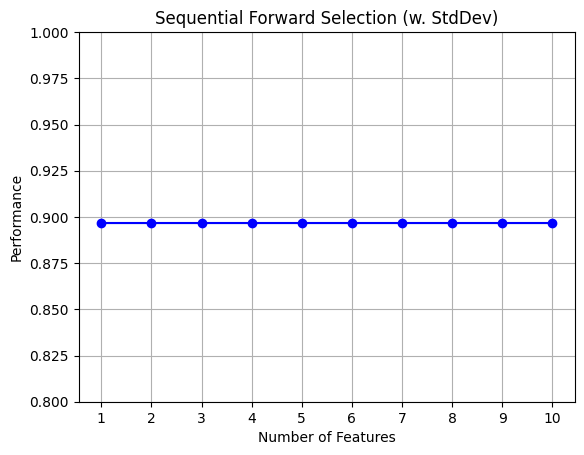

In [ ]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

# plt.ylim([0.8, 1])
# plt.title('Sequential Forward Selection (w. StdDev)')
# plt.grid()
# plt.show()

In [52]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)
print(sfs.k_feature_idx_)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate']
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)


In [53]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X_train[feat_names]

new_data_test = X_test[feat_names]

# first five rows of the new data
new_data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate
7890,26,0,1,3,2,0,0,1,5,0,1,999,0,1,1.4
38176,26,9,2,6,0,1,0,0,9,3,1,999,0,1,-3.4
39574,48,1,1,2,0,1,0,0,4,1,1,3,3,2,-1.8
21859,31,2,2,6,0,1,1,0,7,2,3,999,0,1,1.4
28093,54,3,1,7,0,1,0,0,3,4,1,999,1,0,-1.8


In [56]:
KMEANS={}
matrix = {}
AUC = {}
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=1)
for i in range(1, 16):
  kmeans.fit(new_data.iloc[:, 0:i], y_train.ravel())
  y_pred_X_test= kmeans.predict(new_data_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  KMEANS[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [57]:
KMEANS

{1: 0.39281378975479486,
 2: 0.39281378975479486,
 3: 0.39281378975479486,
 4: 0.39281378975479486,
 5: 0.39281378975479486,
 6: 0.39281378975479486,
 7: 0.39281378975479486,
 8: 0.39281378975479486,
 9: 0.39281378975479486,
 10: 0.6071862102452051,
 11: 0.39281378975479486,
 12: 0.9002184996358339,
 13: 0.9002184996358339,
 14: 0.9002184996358339,
 15: 0.9002184996358339}

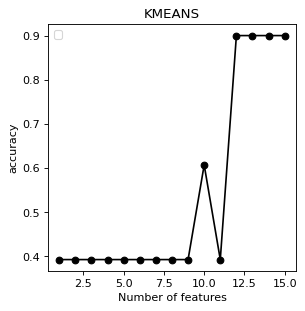

In [61]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,16)
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, KMEANS.values(), '-ok',)
plt.title("KMEANS")
plt.legend()
plt.show()

12


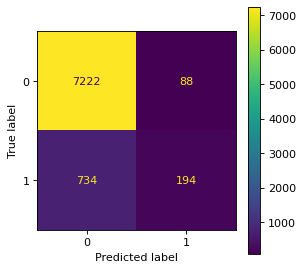

Specificity:  0.9879616963064295
Sensitivity 0.20905172413793102
Precision 0.6879432624113475
F1_score 0.32066115702479336
0.5985067102221802


In [62]:
f_performance(KMEANS)

In [89]:
from sklearn.cluster import KMeans
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

svm = SVC()
sfs = SFS(svm, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  8.2min finished

[2023-05-12 15:29:49] Features: 1/10 -- score: 0.8970257966616085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  7.7min finished

[2023-05-12 15:37:34] Features: 2/10 -- score: 0.8977541729893779[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  7.6min finished

[2023-05-12 15:45:12] Features: 3/10 -- score: 0.8977845220030349[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [90]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)
print(sfs.k_feature_idx_)

['marital', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'euribor3m']
(2, 4, 5, 6, 7, 10, 12, 13, 14, 17)


In [91]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X_train[feat_names]

new_data_test = X_test[feat_names]

# first five rows of the new data
new_data_test.head()

,marital,default,housing,loan,contact,campaign,previous,poutcome,emp.var.rate,euribor3m
7890,1,2,0,0,1,1,0,1,1.4,4.865
38176,2,0,1,0,0,1,0,1,-3.4,0.754
39574,1,0,1,0,0,1,3,2,-1.8,0.668
21859,2,0,1,1,0,3,0,1,1.4,4.964
28093,1,0,1,0,0,1,1,0,-1.8,1.479


In [92]:
SVM={}
matrix = {}
AUC = {}
model = SVC()
for i in range(1, 11):
  model.fit(new_data.iloc[:, 0:i], y_train.ravel())
  y_pred_X_test= model.predict(new_data_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  SVM[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [93]:
SVM

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.8873512988589464,
 4: 0.8873512988589464,
 5: 0.8873512988589464,
 6: 0.8873512988589464,
 7: 0.8880796309783928,
 8: 0.8992473901432386,
 9: 0.8992473901432386,
 10: 0.8996115562029618}

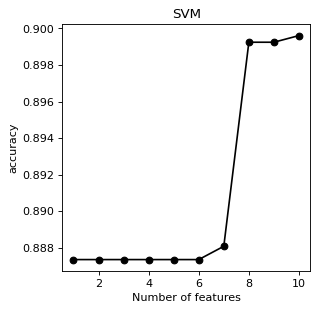

In [94]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,11)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, SVM.values(), '-ok',)
plt.title("SVM")
plt.show()

No of feautres used to get best accuracy 10
Accuracy 0.8996115562029618


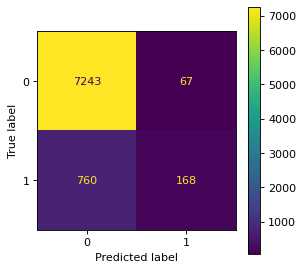

Specificity:  0.9908344733242134
Sensitivity 0.1810344827586207
Precision 0.7148936170212766
F1_score 0.2889079965606191
0.5859344780414171


In [97]:
f_performance(SVM)

FCMEANS

In [25]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from fcmeans import FCM

fcmModel = FCM(n_clusters=2, random_state=1)

sfs = SFS(fcmModel, 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s finished

[2023-05-13 00:58:05] Features: 1/15 -- score: 0.8971775417298937[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.5s finished

[2023-05-13 00:58:11] Features: 2/15 -- score: 0.8971775417298937[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    7.5s finished

[2023-05-13 00:58:19] Features: 3/15 -- score: 0.8971775417298937[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [8]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)
print(sfs.k_feature_idx_)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate']
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)


In [9]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X_train[feat_names]

new_data_test = X_test[feat_names]

# first five rows of the new data
new_data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate
10000,28,0,2,6,0,0,0,1,5,2,3,999,0,1,1.4
25727,53,1,1,2,0,0,0,0,10,2,1,999,0,1,-0.1
33167,49,1,1,1,2,1,0,0,4,1,4,999,1,0,-1.8
24212,49,1,0,3,0,0,0,1,10,0,1,999,0,1,-0.1
8976,43,0,1,6,0,0,0,1,5,3,4,999,0,1,1.4


In [10]:
FCMEANS={}
matrix = {}
AUC = {}

for i in range(1, 16):
  fcmModel.fit(new_data.iloc[:, 0:i], y_train.ravel())
  y_pred_X_test= fcmModel.predict(new_data_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  FCMEANS[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [11]:
FCMEANS

{1: 0.5957756737072105,
 2: 0.40422432629278954,
 3: 0.40422432629278954,
 4: 0.40422432629278954,
 5: 0.40422432629278954,
 6: 0.40422432629278954,
 7: 0.40422432629278954,
 8: 0.40422432629278954,
 9: 0.40422432629278954,
 10: 0.40422432629278954,
 11: 0.40422432629278954,
 12: 0.8988832240835154,
 13: 0.8988832240835154,
 14: 0.8988832240835154,
 15: 0.8988832240835154}

No of feautres used to get best accuracy 12
Accuracy 0.8988832240835154


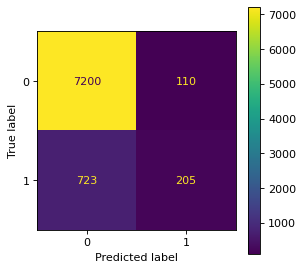

Specificity:  0.9849521203830369
Sensitivity 0.2209051724137931
Precision 0.6507936507936508
F1_score 0.32984714400643605
0.602928646398415


In [12]:
f_performance(FCMEANS)

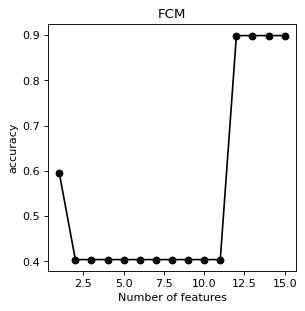

In [15]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,16)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, FCMEANS.values(), '-ok',)
plt.title("FCM")
plt.show()

AdaBoost

In [102]:
from sklearn.ensemble import AdaBoostClassifier
abcModel = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
sfs = SFS(abcModel, 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   14.6s finished

[2023-05-12 16:45:29] Features: 1/15 -- score: 0.8971168437025797[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   13.5s finished

[2023-05-12 16:45:43] Features: 2/15 -- score: 0.8992716236722307[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   13.8s finished

[2023-05-12 16:45:57] Features: 3/15 -- score: 0.8993626707132019[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [64]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

# plt.ylim([0.8, 1])
# plt.title('Sequential Forward Selection (w. StdDev)')
# plt.grid()
# plt.show()

In [103]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)
print(sfs.k_feature_idx_)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
(0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14, 16, 17, 18)


In [104]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X_train[feat_names]

new_data_test = X_test[feat_names]

# first five rows of the new data
new_data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
7890,26,0,1,3,2,0,0,1,5,999,1,1.4,-41.8,4.865,5228.1
38176,26,9,2,6,0,1,0,0,9,999,1,-3.4,-26.9,0.754,5017.5
39574,48,1,1,2,0,1,0,0,4,3,2,-1.8,-40.0,0.668,5008.7
21859,31,2,2,6,0,1,1,0,7,999,1,1.4,-36.1,4.964,5228.1
28093,54,3,1,7,0,1,0,0,3,999,0,-1.8,-47.1,1.479,5099.1


In [105]:
AdaBoost= {}
matrix = {}
AUC = {}

for i in range(1, 16):
  abcModel.fit(new_data.iloc[:, 0:i], y_train)
  y_pred_X_test= abcModel.predict(new_data_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  AdaBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [106]:
AdaBoost

{1: 0.8855304685603301,
 2: 0.8856518572469045,
 3: 0.8854090798737557,
 4: 0.8852876911871813,
 5: 0.8854090798737557,
 6: 0.8863801893663511,
 7: 0.8865015780529255,
 8: 0.8856518572469045,
 9: 0.8867443554260743,
 10: 0.8974265598446225,
 11: 0.8974265598446225,
 12: 0.9002184996358339,
 13: 0.9014323865015781,
 14: 0.9003398883224083,
 15: 0.8998543335761107}

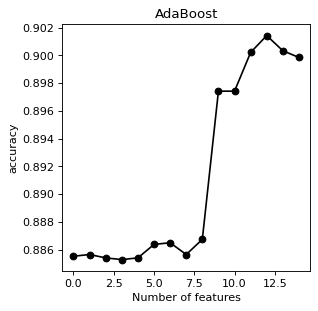

In [107]:
import matplotlib.pyplot as plt
m = np.arange(0,15)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, AdaBoost.values(), '-ok',)
plt.title("AdaBoost")
plt.show()

No of feautres used to get best accuracy 13
Accuracy 0.9014323865015781


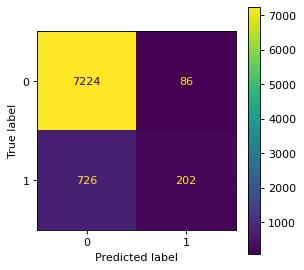

Specificity:  0.9882352941176471
Sensitivity 0.21767241379310345
Precision 0.7013888888888888
F1_score 0.33223684210526316
0.6029538539553753


In [108]:
f_performance(AdaBoost)

GradientBoostingClassifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
# Create adaboost classifer object
gbc=GradientBoostingClassifier(n_estimators=50,learning_rate=0.05)

In [72]:
sfs = SFS(gbc, 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.8s finished

[2023-05-12 15:04:38] Features: 1/15 -- score: 0.8974506828528073[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    7.3s finished

[2023-05-12 15:04:45] Features: 2/15 -- score: 0.8993323216995448[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   15.0s finished

[2023-05-12 15:05:00] Features: 3/15 -- score: 0.899514415781487[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [73]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)
print(sfs.k_feature_idx_)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
(1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 17, 18)


In [74]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X_train[feat_names]

new_data_test = X_test[feat_names]

# first five rows of the new data
new_data_test.head()

,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
7890,0,1,3,2,0,0,5,0,1,999,1,1.4,94.465,4.865,5228.1
38176,9,2,6,0,1,0,9,3,1,999,1,-3.4,92.431,0.754,5017.5
39574,1,1,2,0,1,0,4,1,1,3,2,-1.8,93.876,0.668,5008.7
21859,2,2,6,0,1,1,7,2,3,999,1,1.4,93.444,4.964,5228.1
28093,3,1,7,0,1,0,3,4,1,999,0,-1.8,93.075,1.479,5099.1


In [76]:
GradientBoost= {}
matrix = {}
AUC = {}

for i in range(1, 16):
  gbc.fit(new_data.iloc[:, 0:i], y_train)
  y_pred_X_test= gbc.predict(new_data_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  GradientBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [77]:
GradientBoost

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.8873512988589464,
 4: 0.8873512988589464,
 5: 0.8873512988589464,
 6: 0.8873512988589464,
 7: 0.8877154649186696,
 8: 0.8880796309783928,
 9: 0.887229910172372,
 10: 0.9002184996358339,
 11: 0.8996115562029618,
 12: 0.8999757222626851,
 13: 0.900825443068706,
 14: 0.9002184996358339,
 15: 0.9009468317552805}

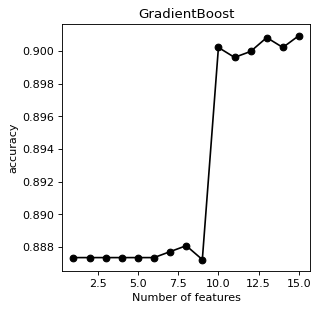

In [78]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,16)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, GradientBoost.values(), '-ok',)
plt.title("GradientBoost")
plt.show()

15


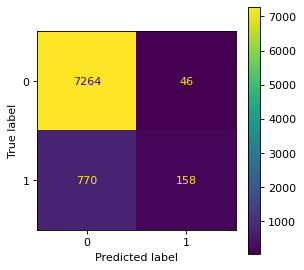

Specificity:  0.9937072503419973
Sensitivity 0.17025862068965517
Precision 0.7745098039215687
F1_score 0.27915194346289757
0.5819829355158262


In [79]:
f_performance(GradientBoost)

XGBClassifier

In [80]:
from xgboost import XGBClassifier
        
xgb_clf = XGBClassifier(n_estimators=50,learning_rate=0.05)

In [81]:
sfs = SFS(xgb_clf, 
           k_features=16, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.7s finished

[2023-05-12 15:10:23] Features: 1/16 -- score: 0.8974506828528073[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    7.7s finished

[2023-05-12 15:10:31] Features: 2/16 -- score: 0.9009711684370258[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   13.7s finished

[2023-05-12 15:10:44] Features: 3/16 -- score: 0.9026707132018209[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [82]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)
print(sfs.k_feature_idx_)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18)


In [83]:
# creating a new dataframe using the above variables and adding the target variable
new_data = X_train[feat_names]

new_data_test = X_test[feat_names]

# first five rows of the new data
new_data_test.head()

,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m,nr.employed
7890,0,1,3,2,0,0,1,0,1,999,0,1,1.4,-41.8,4.865,5228.1
38176,9,2,6,0,1,0,0,3,1,999,0,1,-3.4,-26.9,0.754,5017.5
39574,1,1,2,0,1,0,0,1,1,3,3,2,-1.8,-40.0,0.668,5008.7
21859,2,2,6,0,1,1,0,2,3,999,0,1,1.4,-36.1,4.964,5228.1
28093,3,1,7,0,1,0,0,4,1,999,1,0,-1.8,-47.1,1.479,5099.1


In [85]:

XGBoost= {}
matrix = {}
AUC = {}

for i in range(1, 16):
  xgb_clf.fit(new_data.iloc[:, 0:i], y_train)
  y_pred_X_test= xgb_clf.predict(new_data_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  XGBoost[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

In [86]:
XGBoost

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.887229910172372,
 4: 0.8873512988589464,
 5: 0.8873512988589464,
 6: 0.8873512988589464,
 7: 0.8873512988589464,
 8: 0.8873512988589464,
 9: 0.8873512988589464,
 10: 0.8991260014566642,
 11: 0.899368778829813,
 12: 0.8992473901432386,
 13: 0.9004612770089827,
 14: 0.9016751638747269,
 15: 0.9013109978150037}

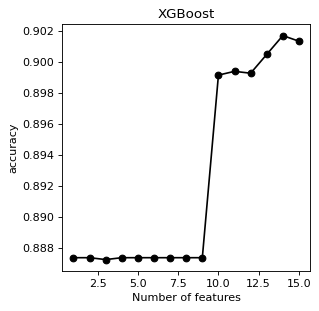

In [87]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
m = np.arange(1,16)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, XGBoost.values(), '-ok',)
plt.title("XGBoost")
plt.show()

14


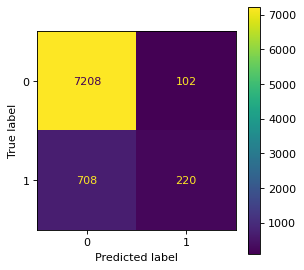

Specificity:  0.986046511627907
Sensitivity 0.23706896551724138
Precision 0.6832298136645962
F1_score 0.352
0.6115577385725742


In [88]:
f_performance(XGBoost)

In [111]:
cycol = cycle('bgrcmk')
def plot_combined_accuracy():
    m=np.arange(1,20)
    plt.xlabel("Features",fontsize=18)
    plt.ylabel("accuracy",fontsize=18)
    plt.plot(SVM.keys(), SVM.values(), c=next(cycol), label="SVM");
    plt.plot(KMEANS.keys(), KMEANS.values(),  c=next(cycol), label="KMEANS");
    plt.plot(AdaBoost.keys(), AdaBoost.values(),  c=next(cycol), label="AdaBoost");
    plt.plot(GradientBoost.keys(), GradientBoost.values(),  c=next(cycol), label="GradientBoost");
    plt.plot(XGBoost.keys(), XGBoost.values(),  c=next(cycol), label="XGBoost");
    plt.legend()
    plt.show()

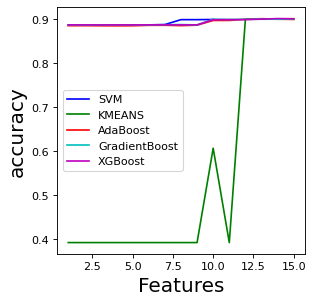

In [112]:
plot_combined_accuracy()

HMM

In [ ]:
class0 = df[df['y'] == 0]
class1 = df[df['y'] == 1]

x_class0 = class0.drop('y', axis=1)
y_class0 = class0[['y']]

x_class1 = class1.drop('y', axis=1)
y_class1 = class1[['y']]

x_trainc0, x_testc0, y_trainc0, y_testc0 = train_test_split(x_class0, y_class0, test_size=0.2, random_state=0)
x_trainc1, x_testc1, y_trainc1, y_testc1  = train_test_split(x_class1, y_class1, test_size=0.2, random_state=0)

model0=GaussianHMM(n_components=1, algorithm="viterbi", covariance_type = "diag",random_state=21, n_iter = 30)
model1=GaussianHMM(n_components=1, algorithm="viterbi", covariance_type = "diag",random_state=21, n_iter = 30)

x_test = np.concatenate((x_testc0, x_testc1))
y_test = np.concatenate((y_testc0, y_testc1))

pred_prob0 = model0.predict_proba(x_test)
pred_prob1 = model1.predict_proba(x_test)

predict_proba_c0 = np.max(model0.predict_proba(x_test), axis=1)
predict_proba_c1 = np.max(model1.predict_proba(x_test), axis=1)

pred_prob = np.column_stack((predict_proba_c0,predict_proba_c1,predict_proba_c2,predict_proba_c0))

In [23]:

sfs = SFS(model0, 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs = sfs.fit(X_train, y_train)

# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

# plt.ylim([0.8, 1])
# plt.title('Sequential Forward Selection (w. StdDev)')
# plt.grid()
# plt.show()

feat_names = list(sfs.k_feature_names_)
print(feat_names)
print(sfs.k_feature_idx_)

# creating a new dataframe using the above variables and adding the target variable
new_data = X_train[feat_names]

new_data_test = X_test[feat_names]

# first five rows of the new data
new_data_test.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   14.1s finished

[2023-05-13 02:08:50] Features: 1/15 -- score: 0.8976934749620638[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   14.1s finished

[2023-05-13 02:09:04] Features: 2/15 -- score: 0.8993323216995448[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   14.1s finished

[2023-05-13 02:09:18] Features: 3/15 -- score: 0.8993323216995448[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s finished

[2023-05-13 02:11:34] Features: 15/15 -- score: 0.900546282245827

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
25222,0,1,3,0,0,0,0,10,1,999,0,1,93.200,-42.0,4.153
24511,9,2,6,0,0,0,0,10,0,999,0,1,93.200,-42.0,4.191
5487,6,1,5,0,0,0,1,4,0,999,0,1,93.994,-36.4,4.857
7850,7,1,3,0,0,0,1,5,0,999,0,1,94.465,-41.8,4.865
20070,0,2,6,0,1,0,0,7,0,999,0,1,93.444,-36.1,4.965


In [24]:
HMM= {}
matrix = {}
AUC = {}

for i in range(1, 16):
  model0.fit(new_data.iloc[:, 0:i], y_train)
  y_pred_X_test= model0.predict(new_data_test.iloc[:, 0:i])
  accura = accuracy_score(y_test, y_pred_X_test)
  HMM[i] = accura
  cm = confusion_matrix(y_test, y_pred_X_test)
  matrix[i] = cm
  auc = metrics.roc_auc_score(y_test, y_pred_X_test)
  AUC[i] = auc

HMM

{1: 0.8873512988589464,
 2: 0.8873512988589464,
 3: 0.8873512988589464,
 4: 0.8873512988589464,
 5: 0.8873512988589464,
 6: 0.8873512988589464,
 7: 0.8873512988589464,
 8: 0.8895362952172857,
 9: 0.8901432386501578,
 10: 0.8980335032774945,
 11: 0.8979121145909201,
 12: 0.898154891964069,
 13: 0.9017965525613013,
 14: 0.9015537751881525,
 15: 0.902282107307599}

No of feautres used to get best accuracy 15
Accuracy 0.902282107307599


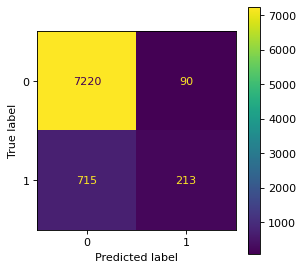

Specificity:  0.987688098495212
Sensitivity 0.22952586206896552
Precision 0.7029702970297029
F1_score 0.3460601137286759
0.6086069802820887


In [25]:
f_performance(HMM)

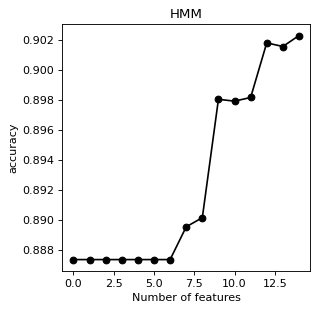

In [26]:
import matplotlib.pyplot as plt
m = np.arange(0,15)
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("accuracy")
plt.plot(m, HMM.values(), '-ok',)
plt.title("HMM")
plt.show()